# Iris Flowers - Supervised learning (K-Nearest Neighbors)  

Machine learning is the field that teaches machines and computers to learn from existing data to make predictions on new data. In this project, I will perform supervised machine learning using a classification model: the K-nearest neighbors.

The dataset contains data pertaining to iris flowers in which the features consist of four measurements: petal length, petal width, sepal length and sepal width. The target variable encodes the species of flower and there are three possibilites: versicolor, virginica and setosa. This is one of the datasets included in scikit-learn.  

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

#Setting the style of the plots
plt.style.use('ggplot')

In [2]:
#Load the dataset
iris = datasets.load_iris()

In [3]:
#Cheking the type of iris
type(iris)   

sklearn.utils.Bunch

In [4]:
#Printing the keys
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#Looking at the data
print(iris['data'])
print(iris['target'])
print(iris['target_names'])
print(iris['feature_names'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [6]:
#Checking the types of data and target
type(iris['data']), type(iris['target'])

(numpy.ndarray, numpy.ndarray)

In [7]:
#Iris data shape
iris['data'].shape

(150, 4)

We have 150 samples and the four features: petal length and width and sepal length and width. Moreover, the target variable is encoded as 0 for "setosa", 1 for "versicolor" and 2 for "virginica". 

In [8]:
#Assign the feature and target data to X and y, respectively
X = iris['data']
y = iris['target']

#Building a dataframe of the feature data
df = pd.DataFrame(X, columns = iris['feature_names'])

In [9]:
#Showing the first 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


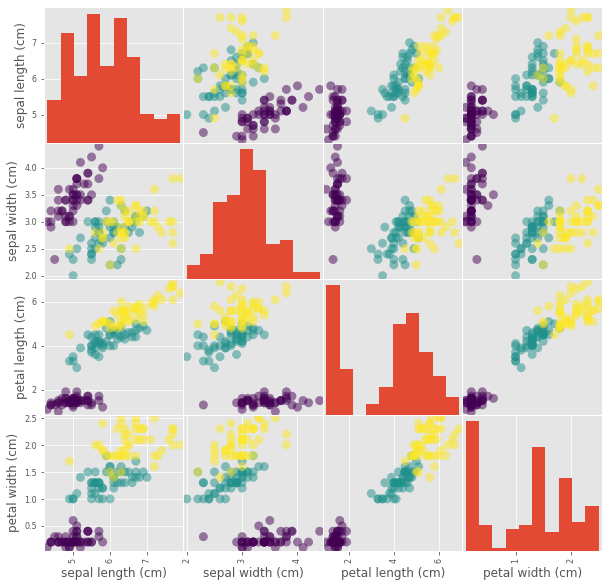

In [10]:
#Brief Exploratory Data Analysis (EDA)
pd.plotting.scatter_matrix(df, c = y, figsize = [10,10],  s = 80, marker = 'o')
plt.show()

The last figure consists of a matrix of figures, which on the diagonal are histograms of the features corresponding to the row and column. The off-diagonal figures are scatter plots of the column feature versus row feature colored by the target variable.

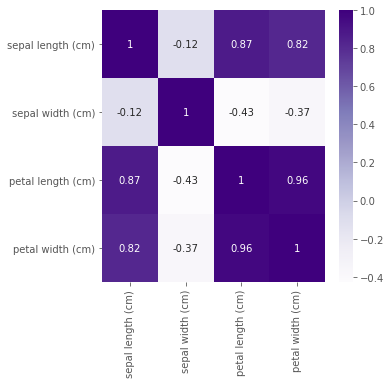

In [11]:
#Checking correlation between different variables
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Purples')
plt.yticks(rotation = 'horizontal')
plt.xticks(rotation = 'vertical')
plt.show()

We can note a strong positive correlation between:

- Petal length (cm) and petal width (cm)
- Sepal length (cm) and petal width (cm)
- Petal length (cm) and sepal length (cm)

We can also note from the scatter matrix that flowers are clustered according to species.

In [12]:
#Splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

#Initiate our KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

#Fit this classifier to our training set
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
#Predicting on test set 

prediction = knn.predict(X_test)

In [15]:
#Printing the labels for the new data

print("Test set of predictions: {}".format(prediction))

Test set of predictions: [2 2 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [16]:
#Checking accuracy of the model

knn.score(X_test, y_test)

0.9777777777777777

We se here that the accuracy of our K-nearest neighbors model is approximately 97.7%, which is a pretty good accuracy.

In the following lines of code we will compute and plot the training and testing accuracy scores for a variety of different neighbor values, in order to get a better understanding on overfitting and underfitting.

In [17]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [18]:
# Loop over different values of k

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

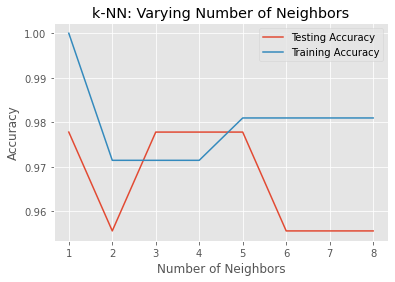

In [19]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

 It looks like the test accuracy is highest when using 3 - 5 neighbors. Using 6 neighbors or more seems to result in a simple model that underfits the data.